In [ ]:
import pandas as pd
from collections import Counter

# Load the updated dataset
updated_file_path = 'hatexplain_removed_stop_words.csv'
df_updated = pd.read_csv(updated_file_path)

# Extract the 'text_array' column
text_array_updated = df_updated['text_array']

# Join all text arrays into a single list
all_tokens_updated = []
for text in text_array_updated:
    # Convert string representation of list to actual list
    tokens = eval(text)
    all_tokens_updated.extend(tokens)

# Remove tokens with tags (that have < > on either side) and recount frequencies
all_tokens_no_tags = [token for token in all_tokens_updated if not (token.startswith('<') and token.endswith('>'))]
token_counter_no_tags = Counter(all_tokens_no_tags)

# Get the 10 most common tokens without tags
top_10_tokens_no_tags = token_counter_no_tags.most_common(10)

# Convert to a DataFrame for better presentation
top_10_no_tags_df = pd.DataFrame(top_10_tokens_no_tags, columns=['Word', 'Frequency'])

In [12]:
# Split the dataset into three subsets based on the 'final_label' column
df_hate_speech = df_updated[df_updated['final_label'] == 0]
df_normal = df_updated[df_updated['final_label'] == 1]
df_offensive = df_updated[df_updated['final_label'] == 2]

# Function to count tokens and return top 10, excluding tags
def count_tokens(dataframe):
    all_tokens = []
    for text in dataframe['text_array']:
        tokens = eval(text)
        tokens_no_tags = [token for token in tokens if not (token.startswith('<') and token.endswith('>'))]
        all_tokens.extend(tokens_no_tags)
    return Counter(all_tokens).most_common(10)

# Count tokens for each label
top_10_hate_speech = count_tokens(df_hate_speech)
top_10_normal = count_tokens(df_normal)
top_10_offensive = count_tokens(df_offensive)

# Convert to DataFrames for better presentation
top_10_hate_speech_df = pd.DataFrame(top_10_hate_speech, columns=['Word', 'Frequency'])
top_10_normal_df = pd.DataFrame(top_10_normal, columns=['Word', 'Frequency'])
top_10_offensive_df = pd.DataFrame(top_10_offensive, columns=['Word', 'Frequency'])



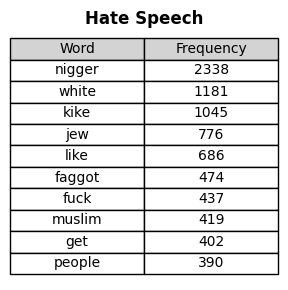

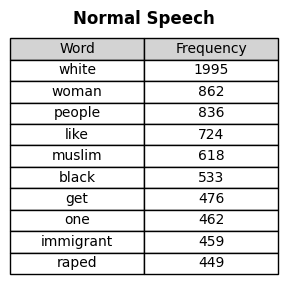

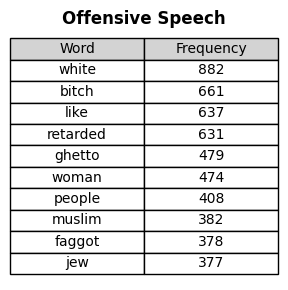

In [13]:
import matplotlib.pyplot as plt

# Function to create a static table visual similar to the provided example
def create_static_table(data, column_titles, title):
    # Set the figure size to accommodate the table
    plt.figure(figsize=(3, 3))
    # Hide the axes
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    # Create the table and scale it to the figure
    table = plt.table(cellText=data.values,
                      colLabels=column_titles,
                      loc='center',
                      cellLoc='center',
                      colColours=["lightgray"]*len(column_titles))
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    # Set the title
    plt.title(title, weight='bold')
    # Tight layout to fit everything
    plt.tight_layout()
    return plt

# Column titles
hate_speech_columns = ['Word', 'Frequency']
normal_speech_columns = ['Word', 'Frequency']
offensive_speech_columns = ['Word', 'Frequency']

# Create the tables
plt_hate_speech = create_static_table(top_10_hate_speech_df, hate_speech_columns, 'Hate Speech')
plt_normal_speech = create_static_table(top_10_normal_df, normal_speech_columns, 'Normal Speech')
plt_offensive_speech = create_static_table(top_10_offensive_df, offensive_speech_columns, 'Offensive Speech')

# Save the tables as images
# plt_hate_speech.savefig('/mnt/data/table_hate_speech.png')
# plt_normal_speech.savefig('/mnt/data/table_normal_speech.png')
# plt_offensive_speech.savefig('/mnt/data/table_offensive_speech.png')

# For the purpose of display, we'll only show one of the tables here
plt_hate_speech.show()